## Cross Validation Notebook (5-fold)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import xgboost as xgb
from sklearn.metrics import log_loss
from datetime import datetime

path = './droped/'
train_X = sp.sparse.load_npz(path + 'train_X.npz')
train_y = np.load(path + 'train_y.npy')
train_VN = np.load(path + 'train_VN.npy')

y = pd.get_dummies(train_y).values.argmax(1)
Y = pd.get_dummies(y).values
N = train_X.shape[0]

folds = [range(0, N, 5), range(1, N, 5), range(2, N, 5), range(3, N, 5), range(4, N, 5)]

xgb_params1 = {'objective':'multi:softprob', 'num_class':38, 'silent':1, 'nthread':8, 
               'eta':.2, 'max_depth':4, 'colsample_bytree':.4, 'subsample':.8}
xgb_params2 = {'objective':'multi:softprob', 'num_class':38, 'silent':1, 'nthread':8, 
               'eta':.2, 'max_depth':5, 'colsample_bytree':.4, 'subsample':.8}
xgb_params3 = {'objective':'multi:softprob', 'num_class':38, 'silent':1, 'nthread':8, 
               'eta':.2, 'max_depth':6, 'colsample_bytree':.4, 'subsample':.8}

param_set = [xgb_params1, xgb_params2, xgb_params3]

In [3]:
for num_round in [550, 620]:
    for xgb_params in param_set:
        print('parameters:')
        print('num_round: ', num_round)
        print(xgb_params)
        print('=====================================================')
        print('TimeCoasted\tFoldID\tTrainLoss\tTestLoss')
        trl = []
        tel = []
        for idx, fold in enumerate(folds):
            other = list(set(range(N))-set(fold))
            trX = train_X[other]
            teX = train_X[fold]
            trY = Y[other]
            teY = Y[fold]
            tr_y = y[other]
            
            dtrain = xgb.DMatrix(trX, label = tr_y)
            dtest = xgb.DMatrix(teX)
            
            t0 = datetime.now()
            bst = xgb.train(xgb_params, dtrain, num_round)
            train_pr = bst.predict(dtrain)
            test_pr = bst.predict(dtest)
            train_loss = log_loss(trY, train_pr)
            test_loss = log_loss(teY, test_pr)
            t1 = datetime.now() - t0
            trl.append(train_loss)
            tel.append(test_loss)
            print(t1, '\t', idx + 1, '\t', train_loss, '\t', test_loss)
        avg_train_loss = np.average(trl)
        avg_test_loss = np.average(tel)
        print('=====================================================')
        print('avg_train_loss:', avg_train_loss, 'avg_test_loss', avg_test_loss)
        print()

parameters:
num_round:  550
{'objective': 'multi:softprob', 'num_class': 38, 'silent': 1, 'nthread': 8, 'eta': 0.2, 'max_depth': 4, 'colsample_bytree': 0.4, 'subsample': 0.8}
TimeCoasted	FoldID	TrainLoss	TestLoss
0:11:41.561865 	 1 	 0.386294136533 	 0.729644137182
2:59:05.966973 	 2 	 0.382477621102 	 0.758050325296
0:12:03.572832 	 3 	 0.384749327804 	 0.743945207172
0:12:03.311927 	 4 	 0.384746858891 	 0.737547000401
0:12:16.652014 	 5 	 0.385206666678 	 0.732994624936
avg_train_loss: 0.384694922202 avg_test_loss 0.740436258997

parameters:
num_round:  550
{'objective': 'multi:softprob', 'num_class': 38, 'silent': 1, 'nthread': 8, 'eta': 0.2, 'max_depth': 5, 'colsample_bytree': 0.4, 'subsample': 0.8}
TimeCoasted	FoldID	TrainLoss	TestLoss
0:12:24.644318 	 1 	 0.311275958829 	 0.731842049873
0:12:27.850278 	 2 	 0.308231581901 	 0.7634495167
0:12:56.622314 	 3 	 0.309783040152 	 0.747483478299
0:12:56.972930 	 4 	 0.309171415092 	 0.738415813053
0:13:08.126570 	 5 	 0.310440546469 	 

In [ ]:
xgb_params1 = {'objective':'multi:softprob', 'num_class':38, 'silent':1, 'nthread':8, 
               'eta':.2, 'max_depth':3, 'colsample_bytree':.6, 'subsample':.6}
xgb_params2 = {'objective':'multi:softprob', 'num_class':38, 'silent':1, 'nthread':8, 
               'eta':.2, 'max_depth':4, 'colsample_bytree':.6, 'subsample':.6}
xgb_params3 = {'objective':'multi:softprob', 'num_class':38, 'silent':1, 'nthread':8, 
               'eta':.2, 'max_depth':5, 'colsample_bytree':.6, 'subsample':.6}

param_set = [xgb_params1, xgb_params2, xgb_params3]

for num_round in [450, 500, 550]:
    for xgb_params in param_set:
        print('parameters:')
        print('num_round: ', num_round)
        print(xgb_params)
        print('=====================================================')
        print('TimeCoasted\tFoldID\tTrainLoss\tTestLoss')
        trl = []
        tel = []
        for idx, fold in enumerate(folds):
            other = list(set(range(N))-set(fold))
            trX = train_X[other]
            teX = train_X[fold]
            trY = Y[other]
            teY = Y[fold]
            tr_y = y[other]
            
            dtrain = xgb.DMatrix(trX, label = tr_y)
            dtest = xgb.DMatrix(teX)
            
            t0 = datetime.now()
            bst = xgb.train(xgb_params, dtrain, num_round)
            train_pr = bst.predict(dtrain)
            test_pr = bst.predict(dtest)
            train_loss = log_loss(trY, train_pr)
            test_loss = log_loss(teY, test_pr)
            t1 = datetime.now() - t0
            trl.append(train_loss)
            tel.append(test_loss)
            print(t1, '\t', idx + 1, '\t', train_loss, '\t', test_loss)
        avg_train_loss = np.average(trl)
        avg_test_loss = np.average(tel)
        print('=====================================================')
        print('avg_train_loss:', avg_train_loss, 'avg_test_loss', avg_test_loss)
        print()

parameters:
num_round:  450
{'objective': 'multi:softprob', 'num_class': 38, 'silent': 1, 'nthread': 8, 'eta': 0.2, 'max_depth': 3, 'colsample_bytree': 0.6, 'subsample': 0.6}
TimeCoasted	FoldID	TrainLoss	TestLoss
0:10:00.977395 	 1 	 0.503120361077 	 0.748613466161
0:09:40.993214 	 2 	 0.497726135494 	 0.771132326996
0:09:36.409729 	 3 	 0.499944305039 	 0.756931938884
0:09:47.693735 	 4 	 0.501188679568 	 0.753284717365
0:09:36.312864 	 5 	 0.502843612739 	 0.750226894341
avg_train_loss: 0.500964618783 avg_test_loss 0.756037868749

parameters:
num_round:  450
{'objective': 'multi:softprob', 'num_class': 38, 'silent': 1, 'nthread': 8, 'eta': 0.2, 'max_depth': 4, 'colsample_bytree': 0.6, 'subsample': 0.6}
TimeCoasted	FoldID	TrainLoss	TestLoss
0:10:19.994678 	 1 	 0.40482167653 	 0.739558955369
0:10:15.699597 	 2 	 0.400560771166 	 0.763645227697
0:10:26.792064 	 3 	 0.40356771532 	 0.749989794214
0:11:09.541810 	 4 	 0.403247624538 	 0.744121575913
0:10:17.475731 	 5 	 0.404181122246 	 

In [2]:
xgb_params1 = {'objective':'multi:softprob', 'num_class':38, 'silent':1, 'nthread':8, 
               'eta':.2, 'max_depth':3, 'colsample_bytree':.6, 'subsample':.7}
xgb_params2 = {'objective':'multi:softprob', 'num_class':38, 'silent':1, 'nthread':8, 
               'eta':.2, 'max_depth':4, 'colsample_bytree':.6, 'subsample':.7}
xgb_params3 = {'objective':'multi:softprob', 'num_class':38, 'silent':1, 'nthread':8, 
               'eta':.2, 'max_depth':5, 'colsample_bytree':.6, 'subsample':.7}

param_set = [xgb_params1, xgb_params2, xgb_params3]

for num_round in [550, 600]:
    for xgb_params in param_set:
        print('parameters:')
        print('num_round: ', num_round)
        print(xgb_params)
        print('=====================================================')
        print('TimeCoasted\tFoldID\tTrainLoss\tTestLoss')
        trl = []
        tel = []
        for idx, fold in enumerate(folds):
            other = list(set(range(N))-set(fold))
            trX = train_X[other]
            teX = train_X[fold]
            trY = Y[other]
            teY = Y[fold]
            tr_y = y[other]
            
            dtrain = xgb.DMatrix(trX, label = tr_y)
            dtest = xgb.DMatrix(teX)
            
            t0 = datetime.now()
            bst = xgb.train(xgb_params, dtrain, num_round)
            train_pr = bst.predict(dtrain)
            test_pr = bst.predict(dtest)
            train_loss = log_loss(trY, train_pr)
            test_loss = log_loss(teY, test_pr)
            t1 = datetime.now() - t0
            trl.append(train_loss)
            tel.append(test_loss)
            print(t1, '\t', idx + 1, '\t', train_loss, '\t', test_loss)
        avg_train_loss = np.average(trl)
        avg_test_loss = np.average(tel)
        print('=====================================================')
        print('avg_train_loss:', avg_train_loss, 'avg_test_loss', avg_test_loss)
        print()

parameters:
num_round:  550
{'objective': 'multi:softprob', 'num_class': 38, 'silent': 1, 'nthread': 8, 'eta': 0.2, 'max_depth': 3, 'colsample_bytree': 0.6, 'subsample': 0.7}
TimeCoasted	FoldID	TrainLoss	TestLoss
0:11:54.434998 	 1 	 0.465748052355 	 0.73738557129
0:11:53.288737 	 2 	 0.46008459825 	 0.766910952022
0:12:06.540454 	 3 	 0.463328477122 	 0.748525012505
0:11:45.267444 	 4 	 0.463768759285 	 0.740887970309
0:11:51.070201 	 5 	 0.465212525987 	 0.740803442247
avg_train_loss: 0.4636284826 avg_test_loss 0.746902589675

parameters:
num_round:  550
{'objective': 'multi:softprob', 'num_class': 38, 'silent': 1, 'nthread': 8, 'eta': 0.2, 'max_depth': 4, 'colsample_bytree': 0.6, 'subsample': 0.7}
TimeCoasted	FoldID	TrainLoss	TestLoss
0:12:55.476881 	 1 	 0.364366453973 	 0.732805522931
0:12:45.460389 	 2 	 0.36168540294 	 0.763383289605
0:12:52.565940 	 3 	 0.363119514461 	 0.743627495521
0:12:47.312209 	 4 	 0.363392295067 	 0.736880907919
0:12:36.468783 	 5 	 0.364324606777 	 0.7

In [4]:
xgb_params2 = {'objective':'multi:softprob', 'num_class':38, 'silent':1, 'nthread':8, 
               'eta':.2, 'max_depth':5, 'colsample_bytree':.4, 'subsample':.7, 'lambda':3}
xgb_params3 = {'objective':'multi:softprob', 'num_class':38, 'silent':1, 'nthread':8, 
               'eta':.2, 'max_depth':5, 'colsample_bytree':.4, 'subsample':.7, 'lambda':5}

param_set = [xgb_params2, xgb_params3]

for num_round in [550]:
    for xgb_params in param_set:
        print('parameters:')
        print('num_round: ', num_round)
        print(xgb_params)
        print('=====================================================')
        print('TimeCoasted\tFoldID\tTrainLoss\tTestLoss')
        trl = []
        tel = []
        for idx, fold in enumerate(folds):
            other = list(set(range(N))-set(fold))
            trX = train_X[other]
            teX = train_X[fold]
            trY = Y[other]
            teY = Y[fold]
            tr_y = y[other]
            
            dtrain = xgb.DMatrix(trX, label = tr_y)
            dtest = xgb.DMatrix(teX)
            
            t0 = datetime.now()
            bst = xgb.train(xgb_params, dtrain, num_round)
            train_pr = bst.predict(dtrain)
            test_pr = bst.predict(dtest)
            train_loss = log_loss(trY, train_pr)
            test_loss = log_loss(teY, test_pr)
            t1 = datetime.now() - t0
            trl.append(train_loss)
            tel.append(test_loss)
            print(t1, '\t', idx + 1, '\t', train_loss, '\t', test_loss)
        avg_train_loss = np.average(trl)
        avg_test_loss = np.average(tel)
        print('=====================================================')
        print('avg_train_loss:', avg_train_loss, 'avg_test_loss', avg_test_loss)
        print()

parameters:
num_round:  550
{'objective': 'multi:softprob', 'num_class': 38, 'silent': 1, 'nthread': 8, 'eta': 0.2, 'max_depth': 5, 'colsample_bytree': 0.4, 'subsample': 0.7, 'lambda': 3}
TimeCoasted	FoldID	TrainLoss	TestLoss
0:12:36.254786 	 1 	 0.354108401809 	 0.729344662158
0:12:42.618563 	 2 	 0.350359382272 	 0.758707592574
0:13:03.659774 	 3 	 0.352825198568 	 0.741517690744
0:12:58.228613 	 4 	 0.351435550162 	 0.736127758564
0:12:56.736466 	 5 	 0.353347175061 	 0.729809408253
avg_train_loss: 0.352415141574 avg_test_loss 0.739101422459

parameters:
num_round:  550
{'objective': 'multi:softprob', 'num_class': 38, 'silent': 1, 'nthread': 8, 'eta': 0.2, 'max_depth': 5, 'colsample_bytree': 0.4, 'subsample': 0.7, 'lambda': 5}
TimeCoasted	FoldID	TrainLoss	TestLoss
0:12:28.307340 	 1 	 0.378992733417 	 0.727304054083
0:12:44.908916 	 2 	 0.375247624405 	 0.755403368495
0:13:23.739662 	 3 	 0.377440486569 	 0.740326340336
0:13:11.847113 	 4 	 0.3770364084 	 0.735742906489
0:13:06.9473

In [6]:
xgb_params3 = {'objective':'multi:softprob', 'num_class':38, 'silent':1, 'nthread':8, 
               'eta':.2, 'max_depth':5, 'colsample_bytree':.4, 'subsample':.7, 'lambda':12}

param_set = [xgb_params3]

for num_round in [550]:
    for xgb_params in param_set:
        print('parameters:')
        print('num_round: ', num_round)
        print(xgb_params)
        print('=====================================================')
        print('TimeCoasted\tFoldID\tTrainLoss\tTestLoss')
        trl = []
        tel = []
        for idx, fold in enumerate(folds):
            other = list(set(range(N))-set(fold))
            trX = train_X[other]
            teX = train_X[fold]
            trY = Y[other]
            teY = Y[fold]
            tr_y = y[other]
            
            dtrain = xgb.DMatrix(trX, label = tr_y)
            dtest = xgb.DMatrix(teX)
            
            t0 = datetime.now()
            bst = xgb.train(xgb_params, dtrain, num_round)
            train_pr = bst.predict(dtrain)
            test_pr = bst.predict(dtest)
            train_loss = log_loss(trY, train_pr)
            test_loss = log_loss(teY, test_pr)
            t1 = datetime.now() - t0
            trl.append(train_loss)
            tel.append(test_loss)
            print(t1, '\t', idx + 1, '\t', train_loss, '\t', test_loss)
        avg_train_loss = np.average(trl)
        avg_test_loss = np.average(tel)
        print('=====================================================')
        print('avg_train_loss:', avg_train_loss, 'avg_test_loss', avg_test_loss)
        print()

parameters:
num_round:  550
{'objective': 'multi:softprob', 'num_class': 38, 'silent': 1, 'nthread': 8, 'eta': 0.2, 'max_depth': 5, 'colsample_bytree': 0.4, 'subsample': 0.7, 'lambda': 12}
TimeCoasted	FoldID	TrainLoss	TestLoss
0:13:01.246020 	 1 	 0.428539649079 	 0.727134673443
0:12:26.079859 	 2 	 0.424748313654 	 0.75412392842
0:12:34.844475 	 3 	 0.427658225927 	 0.741940967264
0:12:32.028722 	 4 	 0.426978464789 	 0.734518646472
0:12:23.958663 	 5 	 0.429190718371 	 0.729073791679
avg_train_loss: 0.427423074364 avg_test_loss 0.737358401456



### CV Result

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5.0*1.5, 4.0*1.5) # set default size of plots
#import seaborn as sns

cv = pd.read_csv('./experimental results/cross validation/crossvalidation.csv')

In [11]:
np.array(test.index)

array([18, 19, 20], dtype=int64)

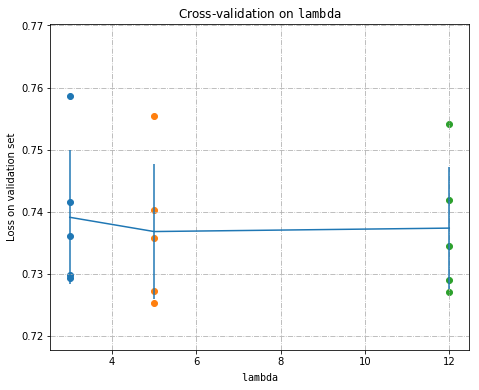

In [23]:
hparam = 'lambda'

for idx in test.index:
    p = test.loc[idx][hparam]
    losses = test.loc[idx][['testloss1','testloss2','testloss3','testloss4','testloss5']].values
    plt.scatter([p] * len(losses), losses)

losses_mean = test['test_avg'].values
losses_std = np.std(test[['testloss1','testloss2','testloss3','testloss4','testloss5']],axis=1).values
plt.errorbar(test[hparam], losses_mean, yerr=losses_std)
plt.title('Cross-validation on $\mathtt{lambda}$')
plt.xlabel(r'$\mathtt{lambda}$')
plt.ylabel('Loss on validation set')
plt.grid(True, linestyle = "-.")  
plt.plt.savefig('cv_lambda.eps')
plt.show()

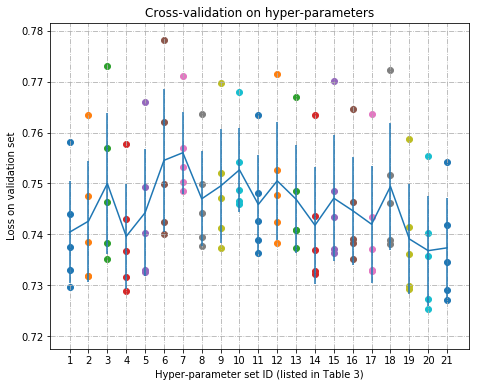

In [27]:
for idx in cv.index:
    losses = cv.loc[idx][['testloss1','testloss2','testloss3','testloss4','testloss5']].values
    plt.scatter([idx+1] * len(losses), losses)

losses_mean = cv['test_avg'].values
losses_std = np.std(cv[['testloss1','testloss2','testloss3','testloss4','testloss5']],axis=1).values
plt.errorbar(np.array(cv.index)+1, losses_mean, yerr=losses_std)
plt.title('Cross-validation on hyper-parameters')
plt.xlabel('Hyper-parameter set ID (listed in Table 3)')
plt.ylabel('Loss on validation set')
plt.xticks(np.arange(1,22))
plt.grid(True, linestyle = "-.")  
plt.savefig('./experimental results/cross validation/cv.eps')
plt.show()

In [43]:
np.mean(test[['testloss1','testloss2','testloss3','testloss4','testloss5']], axis=1)

18    0.739101
19    0.736806
20    0.737358
dtype: float64

### Other Experiments

In [ ]:
# param['tree_method'] = 'gpu_hist'

In [23]:
from sklearn import svm
X = np.array(trainFeature[minifeature])
y = np.array(trainFeature['TripType'])
classifier = svm.SVC()
classifier.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
result = classifier.predict(X)
predicted_y = print(result)